# Kernel PCA

## Dataset

### Layout

* Columns:
    * Characteristics of wine
* Rows: 10s of observations
	* Each row represents a different wine
		* Features:
			* Characteristics of wine
		* Dependent variable:
			* Customer segment
				* 1
				* 2
                * 3

### Background

* A wine merchant has a large set of wines to sell to a large base of customers
* The dataset was provided by the merchant
* One is a data scientist hired by the wine merchant:
    * Clustered the dataset to determine customer segments
        * This was done as a pre-step to the logistic regression model
    * Reduce the number of features used to predict which customer segment a wine belongs to
* New wine will be recommended to customers based on the customer segment they belong to
* The dataset was taken from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine)

### Goals

* Build a logistic regression model using KPCA to reduce the number of features used to predict which customer segment a wine belongs to

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import Dataset

In [2]:
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Split Dataset into Training Set and Test Set

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
print(*X_train[:25], sep='\n')

[1.369e+01 3.260e+00 2.540e+00 2.000e+01 1.070e+02 1.830e+00 5.600e-01
 5.000e-01 8.000e-01 5.880e+00 9.600e-01 1.820e+00 6.800e+02]
[ 12.69   1.53   2.26  20.7   80.     1.38   1.46   0.58   1.62   3.05
   0.96   2.06 495.  ]
[1.162e+01 1.990e+00 2.280e+00 1.800e+01 9.800e+01 3.020e+00 2.260e+00
 1.700e-01 1.350e+00 3.250e+00 1.160e+00 2.960e+00 3.450e+02]
[1.34e+01 3.91e+00 2.48e+00 2.30e+01 1.02e+02 1.80e+00 7.50e-01 4.30e-01
 1.41e+00 7.30e+00 7.00e-01 1.56e+00 7.50e+02]
[1.35e+01 1.81e+00 2.61e+00 2.00e+01 9.60e+01 2.53e+00 2.61e+00 2.80e-01
 1.66e+00 3.52e+00 1.12e+00 3.82e+00 8.45e+02]
[1.373e+01 1.500e+00 2.700e+00 2.250e+01 1.010e+02 3.000e+00 3.250e+00
 2.900e-01 2.380e+00 5.700e+00 1.190e+00 2.710e+00 1.285e+03]
[1.229e+01 2.830e+00 2.220e+00 1.800e+01 8.800e+01 2.450e+00 2.250e+00
 2.500e-01 1.990e+00 2.150e+00 1.150e+00 3.300e+00 2.900e+02]
[1.26e+01 1.34e+00 1.90e+00 1.85e+01 8.80e+01 1.45e+00 1.36e+00 2.90e-01
 1.35e+00 2.45e+00 1.04e+00 2.77e+00 5.62e+02]
[1.141e+01 7.4

In [5]:
print(*y_train[:25], sep='\n')

3
2
2
3
1
1
2
2
2
1
3
2
3
1
3
3
1
3
1
2
3
3
2
3
3


In [6]:
print(*X_test[:25], sep='\n')

[1.374e+01 1.670e+00 2.250e+00 1.640e+01 1.180e+02 2.600e+00 2.900e+00
 2.100e-01 1.620e+00 5.850e+00 9.200e-01 3.200e+00 1.060e+03]
[1.279e+01 2.670e+00 2.480e+00 2.200e+01 1.120e+02 1.480e+00 1.360e+00
 2.400e-01 1.260e+00 1.080e+01 4.800e-01 1.470e+00 4.800e+02]
[1.237e+01 1.130e+00 2.160e+00 1.900e+01 8.700e+01 3.500e+00 3.100e+00
 1.900e-01 1.870e+00 4.450e+00 1.220e+00 2.870e+00 4.200e+02]
[1.356e+01 1.730e+00 2.460e+00 2.050e+01 1.160e+02 2.960e+00 2.780e+00
 2.000e-01 2.450e+00 6.250e+00 9.800e-01 3.030e+00 1.120e+03]
[1.305e+01 5.800e+00 2.130e+00 2.150e+01 8.600e+01 2.620e+00 2.650e+00
 3.000e-01 2.010e+00 2.600e+00 7.300e-01 3.100e+00 3.800e+02]
[ 11.56   2.05   3.23  28.5  119.     3.18   5.08   0.47   1.87   6.
   0.93   3.69 465.  ]
[1.406e+01 2.150e+00 2.610e+00 1.760e+01 1.210e+02 2.600e+00 2.510e+00
 3.100e-01 1.250e+00 5.050e+00 1.060e+00 3.580e+00 1.295e+03]
[1.236e+01 3.830e+00 2.380e+00 2.100e+01 8.800e+01 2.300e+00 9.200e-01
 5.000e-01 1.040e+00 7.650e+00 5.600e-0

In [7]:
print(*y_test[:25], sep='\n')

1
3
2
1
2
2
1
3
2
2
3
3
1
2
3
2
1
1
2
1
2
1
1
2
2


## Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print(*X_train[:25], sep='\n')

[ 0.87668336  0.79842885  0.64412971  0.12974277  0.48853231 -0.70326216
 -1.42846826  1.0724566  -1.36820277  0.35193216  0.0290166  -1.06412236
 -0.2059076 ]
[-0.36659076 -0.7581304  -0.39779858  0.33380024 -1.41302392 -1.44153145
 -0.5029981   1.70109989  0.02366802 -0.84114577  0.0290166  -0.73083231
 -0.81704676]
[-1.69689407 -0.34424759 -0.32337513 -0.45327855 -0.14531976  1.24904997
  0.31964204 -1.52069698 -0.4346309  -0.75682931  0.90197362  0.51900537
 -1.31256499]
[ 0.51613387  1.38326325  0.42085937  1.00427477  0.13639227 -0.75248011
 -1.23309123  0.52239372 -0.33278669  0.95057904 -1.10582753 -1.42518658
  0.02533424]
[ 0.64046128 -0.50620174  0.90461179  0.12974277 -0.28617578  0.44515674
  0.67954711 -0.65631245  0.09156415 -0.64300209  0.72738222  1.7132947
  0.33916246]
[ 0.92641433 -0.78512276  1.23951731  0.85851943  0.06596426  1.21623801
  1.33765922 -0.57773204  1.3136946   0.27604735  1.03291718  0.17182823
  1.79268262]
[-0.8639004   0.4115384  -0.54664548 -0.4

In [10]:
print(*X_test[:25], sep='\n')

[ 0.93884707 -0.63216607 -0.4350103  -0.91969562  1.26324041  0.55999863
  0.97775416 -1.20637533  0.02366802  0.3392847  -0.1455748   0.85229541
  1.04940526]
[-0.24226334  0.26757916  0.42085937  0.7127641   0.84067236 -1.27747161
 -0.60582812 -0.9706341  -0.5873972   2.42611713 -2.06608025 -1.55017035
 -0.86659858]
[-0.76443848 -1.11802849 -0.76991583 -0.16176789 -0.92002786  2.03653722
  1.18341419 -1.36353615  0.44801887 -0.25093054  1.16386073  0.3940216
 -1.06480588]
[ 0.71505773 -0.57818135  0.34643592  0.27549811  1.12238439  1.15061407
  0.85435814 -1.28495574  1.43251284  0.50791762  0.1163123   0.61621496
  1.24761256]
[ 0.08098793  3.08378173 -0.881551    0.56700877 -0.99045587  0.5928106
  0.72067911 -0.49915163  0.68565534 -1.03085781 -0.97488398  0.71342456
 -1.19694407]
[-1.77149051 -0.29026288  3.21173872  2.60758342  1.33366842  1.51154572
  3.21944855  0.83671537  0.44801887  0.40252204 -0.10192695  1.53276259
 -0.91615041]
[ 1.33669479 -0.20028836  0.90461179 -0.56

## Apply Kernel PCA

* The `KernalPCA` class from the `sklearn.decomposition` module of the Scikit-learn library implements the Kernel Principal Component Analysis (PCA) algorithm
* Parameters:
    * `n_components`: The number of principal components to keep (extracted features)
    * `kernel`: The kernel function to use for dimensionality reduction
* The `kpca` variable creates an instance of the `KernalPCA` class
* The `fit_transform` method fits the model with `x` and applies the dimensionality reduction on `x`

*How does one know how many principal components to keep?*

* Start with two principal components to keep
* If one gets good results with two, one will be able to visualize the training and test set results in 2-D
* If results are poor and one cannot visualize results accurately, then additional components should be added
* If results are good, then one can stop adding components

### Reduce Dataset to Two Principal Components

In [11]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, kernel='rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

## Train Logistic Regression Model on Training Set

In [12]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## Predict Test Set Results

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
y_pred_actual = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
print(*y_pred_actual[:25], sep='\n')

[1 1]
[3 3]
[2 2]
[1 1]
[2 2]
[2 2]
[1 1]
[3 3]
[2 2]
[2 2]
[3 3]
[3 3]
[1 1]
[2 2]
[3 3]
[2 2]
[1 1]
[1 1]
[2 2]
[1 1]
[2 2]
[1 1]
[1 1]
[2 2]
[2 2]


## Make Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [16]:
print(cm)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


## Compute Accuracy Score

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

Results:

Model is $100\%$ accurate.

## Visualize Training Set Results

In [18]:
from matplotlib.colors import ListedColormap
from opengood.py_ml_plot import setup_classification_plot

opengood.py_ml_plot imported


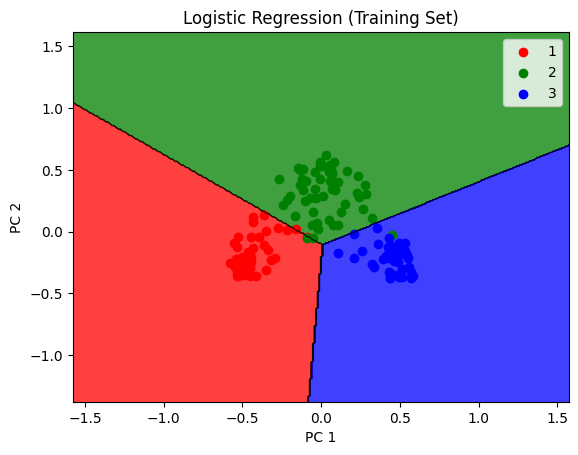

In [19]:
setup_classification_plot(
    x=X_train,
    y=y_train,
    cmap=ListedColormap(("red", "green", "blue")),
    title="Logistic Regression (Training Set)",
    x_label="PC 1",
    y_label="PC 2",
    meshgrid=[{"min": 1, "max": 1, "step": 0.01}, {"min": 1, "max": 1, "step": 0.01}],
    feature_scale=None,
    predict=lambda x1, x2: (
        classifier.predict(
            np.array([x1.ravel(), x2.ravel()]).T
        ).reshape(x1.shape)
    )
)
plt.show()

## Visualize Test Set Results

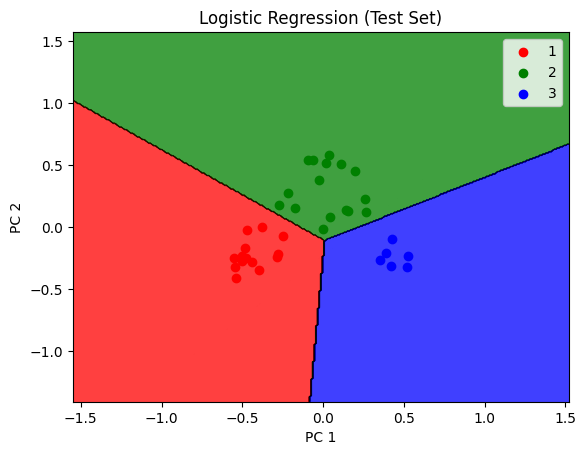

In [20]:
setup_classification_plot(
    x=X_test,
    y=y_test,
    cmap=ListedColormap(("red", "green", "blue")),
    title="Logistic Regression (Test Set)",
    x_label="PC 1",
    y_label="PC 2",
    meshgrid = [{"min": 1, "max": 1, "step": 0.01}, {"min": 1, "max": 1, "step": 0.01}],
    feature_scale=None,
    predict=lambda x1, x2: (
        classifier.predict(
            np.array([x1.ravel(), x2.ravel()]).T
        ).reshape(x1.shape)
    )
)
plt.show()

## Interpreting Results

* From visualizations:
    * x-axis = principal component 1
    * y-axis = principal component 2
    * Red region = customer segment 1
    * Green region = customer segment 2
    * Blue region = customer segment 3
* Both visualizations predicted excellent results
* The model was able to correctly predict the customer segments
* One is confident the model will predict customer segments for new wines